## Nataf - Example 1

Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.Distributions import Distribution
import numpy as np
import matplotlib.pyplot as plt

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.


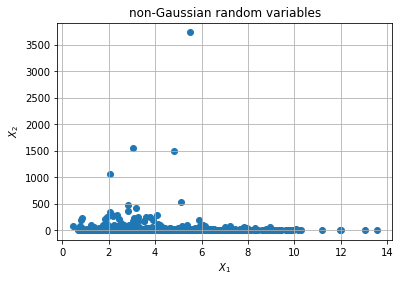

In [2]:
# Example 1a: Nataf transformation
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

x = MCS(dist_object=[dist1,dist2], nsamples=1000, random_state=[4, 5],   verbose=True)

# Plot the initial samples
plt.figure()
plt.title('non-Gaussian random variables')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [3]:
from UQpy.Transformations import Forward
Rho = np.array([[1.0, 0.3], [0.3, 1.0]])
y = Forward(dist_object=[dist1,dist2], samples=x.samples, cov=Rho)

print('Distorted correlation matrix', y.Cz)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.2998816935848832]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.12392056822736769]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.034768508290895866]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.008431574777820142]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0021221219429043356]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.0005292009872665013]
UQpy: ITAM Done.
Distorted correlation matrix [[1.         0.8626152

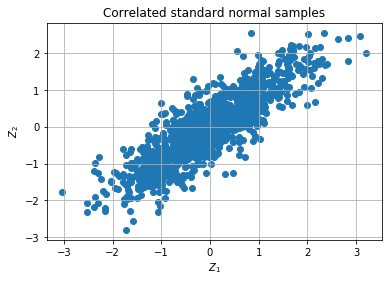

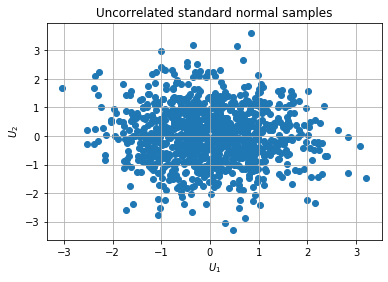

In [4]:
plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(y.z[:, 0], y.z[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

plt.figure()
plt.title('Uncorrelated standard normal samples')
plt.scatter(y.u[:, 0], y.u[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

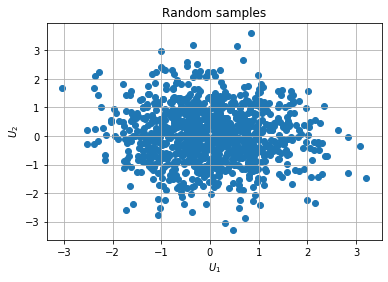

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Distorted correlation matrix [[1.         0.30009353]
 [0.30009353 1.        ]]


In [5]:
from UQpy.Transformations import Inverse, Normal

plt.figure()
plt.title('Random samples')
plt.scatter(y.u[:, 0], y.u[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

w = Inverse(dist_object=[dist1,dist2], samples=y.u, cov=y.Cz)


print('Distorted correlation matrix', w.Cx)


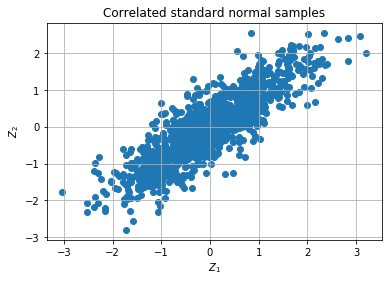

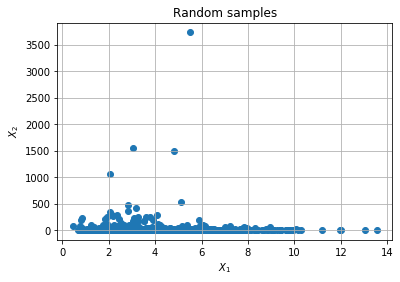

[[  3.76433963   6.56961331]
 [  4.70973474   1.40250468]
 [  2.07115224 351.26550921]
 ...
 [  1.91731987   2.43583236]
 [  5.84524978   5.12337303]
 [  4.40368802   3.39843539]]


In [6]:
plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(w.z[:, 0], w.z[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()


plt.figure()
plt.title('Random samples')
plt.scatter(w.x[:, 0], w.x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

print(w.x)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.149724142093604]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.1496417026813484]
UQpy: ITAM Done.
0
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.8766579633244189]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.8550303055553368]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.8450502271240938]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.8402613868

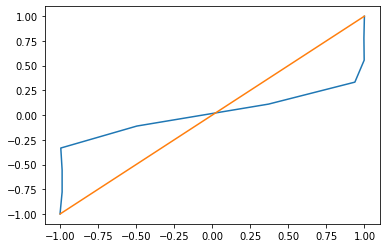

In [7]:
w3 = np.zeros(10)
rho = np.linspace(-0.999, 0.999, 10)
for i in range(10):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Forward.distortion_x_to_z([dist1,dist2], Rho1)
    w3[i] = ww[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

In [8]:
x2 = MCS(dist_object=dist1, nsamples=1000, random_state=2,  verbose=True)
y2 = Forward(dist_object=dist1, samples=x2.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.


In [9]:
y3 = Inverse(dist_object=dist1, samples=y2.u)
print(y3.x)

[[ 2.92513177]
 [ 3.55997577]
 [ 1.19306336]
 [ 2.27948697]
 [ 1.9910267 ]
 [ 2.18695331]
 [ 3.74678511]
 [ 1.91556484]
 [ 3.63015641]
 [ 6.40820929]
 [ 2.41294922]
 [ 3.68397587]
 [ 4.18023116]
 [ 2.08049547]
 [ 2.57617007]
 [ 1.83030478]
 [ 3.17521563]
 [ 9.8139633 ]
 [ 4.42274026]
 [ 6.93498328]
 [ 3.66668536]
 [ 4.80632719]
 [ 1.12670565]
 [ 8.08098612]
 [ 4.96629359]
 [ 3.75929255]
 [ 5.935162  ]
 [ 2.98427004]
 [ 4.56096427]
 [ 6.69973682]
 [ 4.09626126]
 [ 1.13499052]
 [ 3.59141616]
 [ 4.32701194]
 [ 2.51607855]
 [ 1.54332503]
 [ 2.55264107]
 [ 5.52799008]
 [ 1.93949514]
 [ 7.61453735]
 [ 5.16527962]
 [ 0.98856931]
 [ 3.31569529]
 [ 3.52078285]
 [ 2.9463738 ]
 [ 1.6031462 ]
 [ 2.85123603]
 [ 4.38044351]
 [ 4.07176018]
 [ 7.07372256]
 [ 1.24402613]
 [ 6.04260646]
 [ 6.40412683]
 [ 0.76086023]
 [ 1.89673739]
 [ 4.56007006]
 [ 8.42345292]
 [ 4.57691477]
 [ 3.07879882]
 [ 2.69511913]
 [ 2.19614018]
 [ 2.64746489]
 [ 2.48505045]
 [ 2.16008515]
 [ 2.03795768]
 [ 4.55852708]
 [ 5.41974

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.


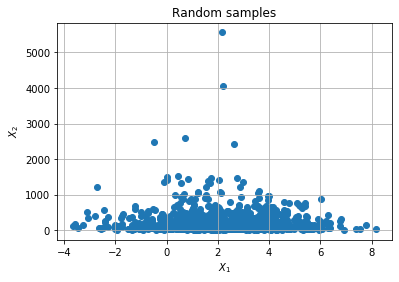

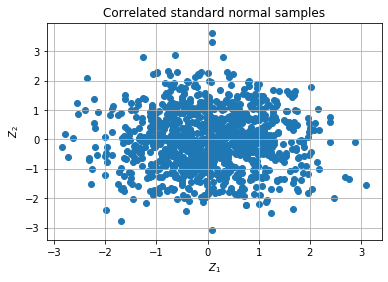

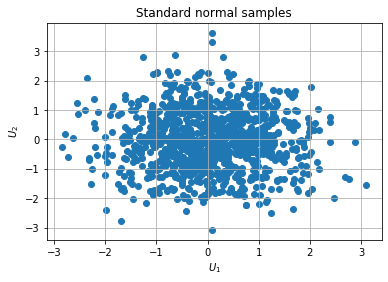

In [10]:
from UQpy.Distributions import Normal, Lognormal, JointInd
marginals = [Normal(loc=2., scale=2.), 
             Lognormal(s=1., loc=0., scale=np.exp(5))]


dist = JointInd(marginals=marginals)
x1 = MCS(dist_object=dist, nsamples=1000,  verbose=True)

# Plot the initial samples
plt.figure()
plt.title('Random samples')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

y1 = Forward(dist_object=dist, samples=x1.samples, beta=1.0, itam_error1=0.001,
                 itam_error2=0.01)
plt.figure()
plt.title('Correlated standard normal samples')
plt.scatter(y1.z[:, 0], y1.z[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

plt.figure()
plt.title('Standard normal samples')
plt.scatter(y1.u[:, 0], y1.u[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distor

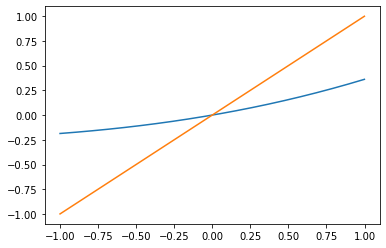

In [16]:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

N = 20
w4 = np.zeros(N)
rho = np.linspace(-0.999, 0.999, N)
for i in range(N):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Inverse.distortion_z_to_x(dist_object=[dist1,dist2], cov=Rho1)
    w4[i] = ww[0, 1]

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()

In [17]:
from UQpy.Distributions import Gamma, Lognormal
dist1 = Gamma(4.0, loc=0.0, scale=1.0)
dist2 = Lognormal(s=2., loc=0., scale=np.exp(1))

x = MCS(dist_object=[dist1,dist2], nsamples=5, random_state=[4, 5],   verbose=True)
print(x.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[[  3.76433963   6.56961331]
 [  4.70973474   1.40250468]
 [  2.07115224 351.26550921]
 [  5.16162027   1.64183701]
 [  2.92258993   3.38454568]]


In [18]:
from UQpy.Transformations import Forward
Rho = np.array([[1.0, 0.3], [0.3, 1.0]])
print(Rho)
y = Forward(dist_object=[dist1,dist2], samples=x.samples, cov=Rho)
print(y.u)

[[1.  0.3]
 [0.3 1. ]]
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.2998816935848832]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.12392056822736769]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.034768508290895866]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.008431574777820142]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0021221219429043356]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.0005292009872665013]
UQpy: ITAM Done.
